### 1. Importing Libraries and Data

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt 
import os 
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path
path = r'C:\Users\julia\Hate Crime'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'hate_crimes_wrangled.csv'))

### 2. Data Cleaning 

In [5]:
df.head()

,Unnamed: 0,DATA_YEAR,STATE_ABBR,STATE_NAME,REGION_NAME,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,BIAS_DESC
0,0,1991,AR,Arkansas,South,1,White,1,Intimidation,1,Anti-Black or African American
1,1,1991,AR,Arkansas,South,1,Black or African American,1,Simple Assault,1,Anti-White
2,2,1991,AR,Arkansas,South,1,Black or African American,1,Aggravated Assault,1,Anti-Black or African American
3,3,1991,AR,Arkansas,South,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1,Anti-White
4,4,1991,AR,Arkansas,South,1,Black or African American,1,Aggravated Assault,1,Anti-White


In [6]:
df.shape

(180293, 11)

In [7]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                  0
DATA_YEAR                   0
STATE_ABBR                  0
STATE_NAME                  0
REGION_NAME                 0
TOTAL_OFFENDER_COUNT        0
OFFENDER_RACE               0
VICTIM_COUNT                0
OFFENSE_NAME                0
TOTAL_INDIVIDUAL_VICTIMS    0
BIAS_DESC                   0
dtype: int64

In [8]:
# Check for duplicates
dups = df.duplicated()

In [9]:
dups.shape

(180293,)

In [10]:
df.columns

Index(['Unnamed: 0', 'DATA_YEAR', 'STATE_ABBR', 'STATE_NAME', 'REGION_NAME',
       'TOTAL_OFFENDER_COUNT', 'OFFENDER_RACE', 'VICTIM_COUNT', 'OFFENSE_NAME',
       'TOTAL_INDIVIDUAL_VICTIMS', 'BIAS_DESC'],
      dtype='object')

In [11]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 0'],axis = 1)

In [12]:
df.columns

Index(['DATA_YEAR', 'STATE_ABBR', 'STATE_NAME', 'REGION_NAME',
       'TOTAL_OFFENDER_COUNT', 'OFFENDER_RACE', 'VICTIM_COUNT', 'OFFENSE_NAME',
       'TOTAL_INDIVIDUAL_VICTIMS', 'BIAS_DESC'],
      dtype='object')

In [13]:
# Renaming columns 
new_names = {'DATA_YEAR':'incident_year',
             'STATE_ABBR':'state_abbr',
             'STATE_NAME':'state_name',
             'REGION_NAME':'region_name',
             'TOTAL_OFFENDER_COUNT':'offender_count',
             'OFFENDER_RACE':'offender_race',
             'VICTIM_COUNT':'victim_count',
             'OFFENSE_NAME':'offense_type',
             'TOTAL_INDIVIDUAL_VICTIMS':'total_individual_victims',
             'BIAS_DESC':'prejudice'}

df.rename(columns=new_names,inplace=True)

C:\Users\julia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_individual_victims', ylabel='Density'>

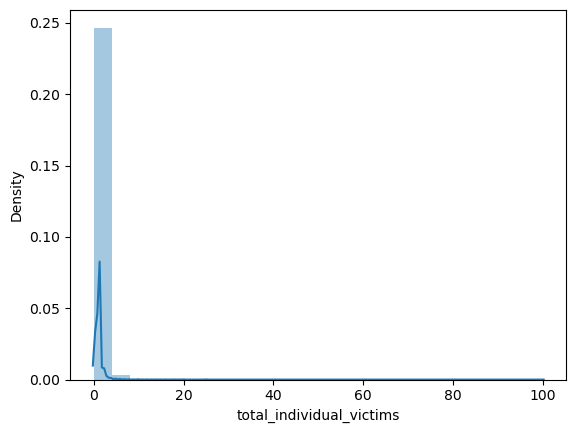

In [14]:
# Check for extreme values
sns.distplot(df['total_individual_victims'],bins = 25, kde = True)

In [15]:
#Check for mean 
df['total_individual_victims'].mean()

0.9897278319180445

In [16]:
#Check for median 
df['total_individual_victims'].median()

1.0

In [17]:
#Check for min
df['total_individual_victims'].min()

0

In [18]:
#Check for max
df['total_individual_victims'].max()

100

In [19]:
df.describe()

,incident_year,offender_count,victim_count,total_individual_victims
count,180293.000000,180293.000000,180293.000000,180293.000000
mean,2003.843067,0.993860,1.243043,0.989728
std,7.682728,1.412837,1.009580,1.022176
min,1991.000000,0.000000,1.000000,0.000000
25%,1997.000000,0.000000,1.000000,1.000000
50%,2003.000000,1.000000,1.000000,1.000000
75%,2010.000000,1.000000,1.000000,1.000000
max,2018.000000,99.000000,100.000000,100.000000


### 3. Data Prep for Regression Analysis
#### Hypothesis: If the total individual victims count increases, then the victim count increases.

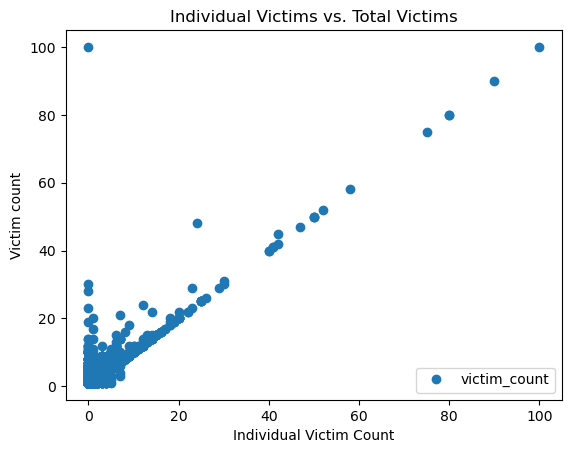

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'total_individual_victims', y='victim_count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Individual Victims vs. Total Victims')  
plt.xlabel('Individual Victim Count')  
plt.ylabel('Victim count')  
plt.show()

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['total_individual_victims'].values.reshape(-1,1)
y = df['victim_count'].values.reshape(-1,1)

In [22]:
X

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [2]], dtype=int64)

In [23]:
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [24]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression Analysis

In [25]:
# Create regression object
regression = LinearRegression()

In [26]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

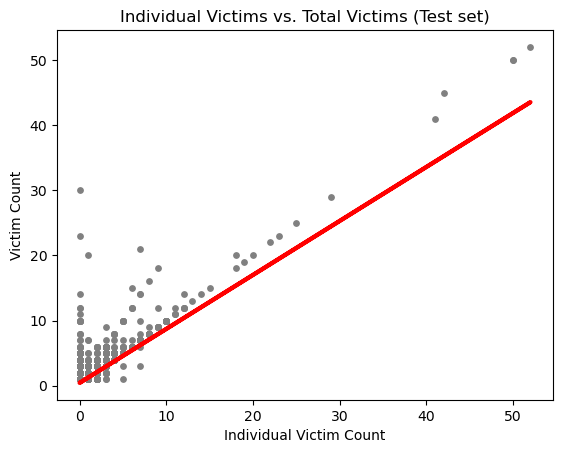

In [28]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Individual Victims vs. Total Victims (Test set)')
plot_test.xlabel('Individual Victim Count')
plot_test.ylabel('Victim Count')
plot_test.show()

In [29]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [30]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.82890271]]
Mean squared error:  0.279603202785011
R2 score:  0.6540993570421774


### Intepretation:
#### The slope is positive, so the relationship is positive. This aligns with my hypothesis that the higher the count of individual victims, the higher the victim count. The MSE (~0.28) is small , so the regression line passes fairly close to the observations, making it a good fit. Also, the R2 score of ~0.65 represents an OK score. 

In [31]:
# Predict on the training set
# This is predicting X_train!
y_predicted_train = regression.predict(X_train) 

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.82890271]]
Mean squared error:  0.34180400268475425
R2 score:  0.6919644035679235


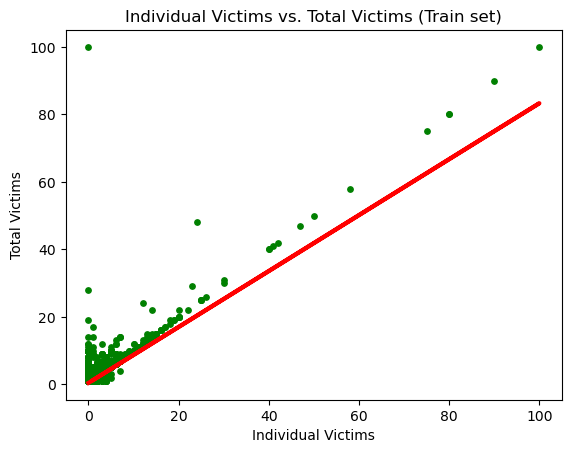

In [34]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Individual Victims vs. Total Victims (Train set)')
plot_test.xlabel('Individual Victims')
plot_test.ylabel('Total Victims')
plot_test.show()

In [35]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,1.251727
1,1,1.251727
2,1,1.251727
3,1,1.251727
4,1,1.251727
5,1,1.251727
6,1,1.251727
7,2,2.080629
8,1,1.251727
9,1,1.251727


#### The models outcome on the training set is very similar to that on the test set.  Same slope, but slightly higher MSE and R2 score. 

In [36]:
# exporting data 
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'new_hate_crime_wrangled.csv'))